<a href="https://colab.research.google.com/github/Alzategelizabeth/cartografia_geotecnica/blob/main/TP1/Seleccion_Variables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install rasterio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.3 MB 2.7 MB/s 


##**INVENTARIO**

In [ ]:
#Libreria
import rasterio as rio
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

(821560,)

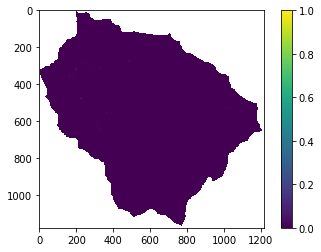

In [ ]:
raster = rio.open('https://github.com/Alzategelizabeth/Cartografia-/blob/main/Taller%205/morfometria/InventariMenM.tif?raw=true')
inventario=raster.read(1)
inventario=np.where(inventario==15,0,inventario)
raster_mask = rio.open('https://github.com/Alzategelizabeth/Cartografia-/blob/main/Taller%205/morfometria/pendiente.tif?raw=true')
msk=raster_mask.read_masks(1) #sirve para arreglar datos incompletos
msk=np.where(msk==255,1,np.nan)
inventario=msk*inventario
inventario_vector=inventario.ravel()
inventario_vector_MenM=inventario_vector[~np.isnan(inventario_vector)] # para eliminar  del vector los datos No data y dejar solo los que tienen datos en la cuenca
plt.imshow(inventario)
plt.colorbar()
inventario_vector_MenM.shape


In [ ]:
np.unique(inventario_vector_MenM)

array([0., 1.])

##**SELECCIÓN DE VARIABLES**




**PENDIENTE**

In [ ]:
import rasterio as rio
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns #libreria para graficar
from pandas import DataFrame
import statsmodels.graphics.api as smg #libreria de estadistica

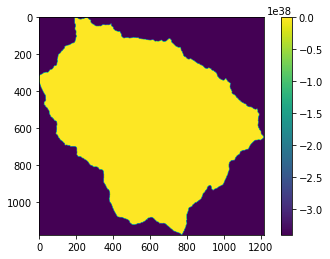

In [ ]:
raster = rio.open('https://github.com/Alzategelizabeth/Cartografia-/blob/main/Taller%205/morfometria/pendiente.tif?raw=true')
pendiente=raster.read(1)
plt.imshow(pendiente)
plt.colorbar();

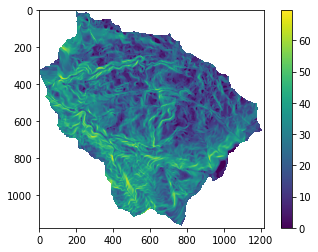

In [ ]:
#Se busca que se tomen los NoData correctamente
pendiente=np.where(pendiente<0,np.nan,pendiente)#np.where--cambia los valores menores a 0
plt.imshow(pendiente)
plt.colorbar()

In [ ]:
np.shape(pendiente)#conocer el tamaño de la matriz

(1178, 1217)

In [ ]:
pendiente_vector=pendiente.ravel()  # para pasarlo a un vector
pendiente_vector_MenM=pendiente_vector[~np.isnan(pendiente_vector)] # para eliminar  del vector los datos No data y dejar solo los que tienen datos en la cuenca
pendiente_vector_MenM.shape

(821560,)

In [ ]:
~np.isnan(pendiente_vector)

array([False, False, False, ..., False, False, False])

**ASPECTO**

(821560,)

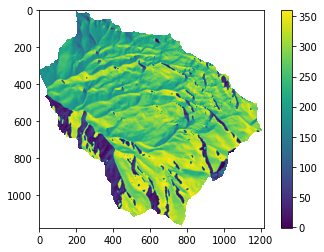

In [ ]:
raster = rio.open('https://github.com/Alzategelizabeth/Cartografia-/blob/main/Taller%205/morfometria/aspecto.tif?raw=true')
aspecto=raster.read(1)
aspecto=np.where(aspecto<-100,np.nan,aspecto)
aspecto_vector=aspecto.ravel()
aspecto_vector_MenM=aspecto_vector[~np.isnan(aspecto_vector)]
plt.imshow(aspecto)
plt.colorbar()
aspecto_vector_MenM.shape

**CURVATURA**

(821560,)

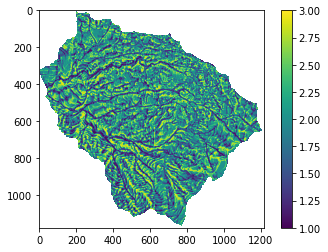

In [ ]:
raster = rio.open('https://github.com/Alzategelizabeth/Cartografia-/blob/main/Taller%205/morfometria/curvaturareclassify.tif?raw=true')
curvatura=raster.read(1)
curvatura=np.where(curvatura>3,np.nan,curvatura)
raster_mask = rio.open('https://github.com/Alzategelizabeth/Cartografia-/blob/main/Taller%205/morfometria/pendiente.tif?raw=true')
msk=raster_mask.read_masks(1)
msk=np.where(msk==255,1,np.nan)
curvatura=msk*curvatura
curvatura_vector=curvatura.ravel()
curvatura_vector_MenM=curvatura_vector[~np.isnan(curvatura_vector)]
plt.imshow(curvatura)
plt.colorbar()
np.unique(curvatura)
curvatura_vector_MenM.shape

In [ ]:
curvatura_vector_MenM.shape

(821560,)

In [ ]:
np.unique(curvatura_vector_MenM)

array([1., 2., 3.])

**GEOLOGÍA**

(821560,)

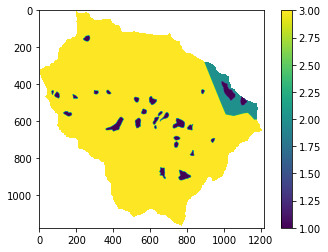

In [ ]:
raster = rio.open('https://github.com/Alzategelizabeth/Cartografia-/blob/main/Taller%205/morfometria/geologia.tif?raw=true')
geologia=raster.read(1)
raster_mask = rio.open('https://github.com/Alzategelizabeth/Cartografia-/blob/main/Taller%205/morfometria/pendiente.tif?raw=true')
msk=raster_mask.read_masks(1)
msk=np.where(msk==255,1,np.nan)
geologia=msk*geologia
geologia_vector=geologia.ravel()
geologia_vector_MenM=geologia_vector[~np.isnan(geologia_vector)]
plt.imshow(geologia)
plt.colorbar()
geologia_vector_MenM.shape

In [ ]:
np.unique(geologia)

array([ 1.,  2.,  3., nan])

**GEOMORFOLOGÍA**

(821560,)

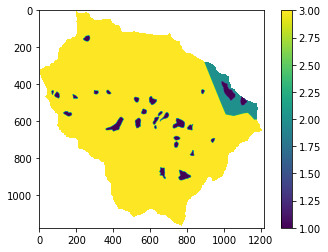

In [ ]:
raster = rio.open('https://github.com/Alzategelizabeth/Cartografia-/blob/main/Taller%205/morfometria/subunidades.tif?raw=true')
geomorfologia=raster.read(1)
raster_mask = rio.open('https://github.com/Alzategelizabeth/Cartografia-/blob/main/Taller%205/morfometria/pendiente.tif?raw=true')
msk=raster_mask.read_masks(1)
msk=np.where(msk==255,1,np.nan)
geomorfologia=msk*geologia
geomorfologia_vector=geomorfologia.ravel()
geomorfologia_vector_MenM=geomorfologia_vector[~np.isnan(geologia_vector)]
plt.imshow(geomorfologia)
plt.colorbar()
geomorfologia_vector_MenM.shape

In [ ]:
np.unique(geomorfologia)

array([ 1.,  2.,  3., nan])

**FLUJO ACUMULADO**

(821560,)

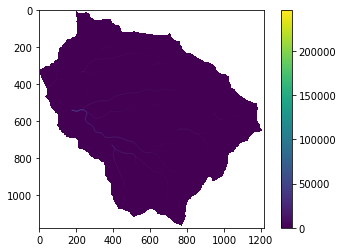

In [ ]:
raster = rio.open('https://github.com/Alzategelizabeth/Cartografia-/blob/main/Taller%205/morfometria/flowacc2.tif?raw=true')
flujo=raster.read(1)
raster_mask = rio.open('https://github.com/Alzategelizabeth/Cartografia-/blob/main/Taller%205/morfometria/pendiente.tif?raw=true')
msk=raster_mask.read_masks(1)
msk=np.where(msk==255,1,np.nan)
flujo=msk*flujo
flujo_vector=flujo.ravel()
flujo_vector_MenM=flujo_vector[~np.isnan(flujo_vector)]
plt.imshow(flujo)
plt.colorbar()
flujo_vector_MenM.shape

In [ ]:
np.unique(flujo)

array([0.00000e+00, 1.00000e+00, 2.00000e+00, ..., 2.45783e+05,
       2.45876e+05,         nan])

##**DATA FRAME**

In [ ]:
d={'inventario':inventario_vector_MenM,'geomorfologia':geomorfologia_vector_MenM,'geologia':geologia_vector_MenM,'flujo':flujo_vector_MenM,'pendiente':pendiente_vector_MenM,'aspecto':aspecto_vector_MenM,'curvatura':curvatura_vector_MenM}
df = pd.DataFrame(d)
print(list(df.columns))

['inventario', 'geomorfologia', 'geologia', 'flujo', 'pendiente', 'aspecto', 'curvatura']


In [ ]:
df.head()

,inventario,geomorfologia,geologia,flujo,pendiente,aspecto,curvatura
0,0.0,3.0,3.0,7.0,35.672390,138.732468,1.0
1,0.0,3.0,3.0,8.0,35.078232,137.794312,1.0
2,0.0,3.0,3.0,9.0,32.974354,140.078018,1.0
3,0.0,3.0,3.0,10.0,34.152977,142.213806,1.0
4,0.0,3.0,3.0,0.0,15.028431,111.181129,3.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 821560 entries, 0 to 821559
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   inventario     821560 non-null  float64
 1   geomorfologia  821560 non-null  float64
 2   geologia       821560 non-null  float64
 3   flujo          821560 non-null  float64
 4   pendiente      821560 non-null  float32
 5   aspecto        821560 non-null  float32
 6   curvatura      821560 non-null  float64
dtypes: float32(2), float64(5)
memory usage: 37.6 MB


In [ ]:
df1=df[(df["inventario"]==1) | (df["inventario"]==0).sample(frac=.1)]#se genera un df que solo trabaja con  el 10%
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82203 entries, 23 to 821540
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   inventario     82203 non-null  float64
 1   geomorfologia  82203 non-null  float64
 2   geologia       82203 non-null  float64
 3   flujo          82203 non-null  float64
 4   pendiente      82203 non-null  float32
 5   aspecto        82203 non-null  float32
 6   curvatura      82203 non-null  float64
dtypes: float32(2), float64(5)
memory usage: 4.4 MB


In [ ]:
resumen=df1.describe().T
print(resumen)

                 count        mean          std  min         25%         50%  \
inventario     82203.0    0.000633     0.025143  0.0    0.000000    0.000000   
geomorfologia  82203.0    2.901634     0.387209  1.0    3.000000    3.000000   
geologia       82203.0    2.901634     0.387209  1.0    3.000000    3.000000   
flujo          82203.0  256.874262  3666.171493  0.0    5.000000   14.000000   
pendiente      82203.0   26.702219    11.935246  0.0   17.782377   26.447369   
aspecto        82203.0  238.558853    93.285271 -1.0  205.794991  262.836945   
curvatura      82203.0    1.991205     0.741173  1.0    1.000000    2.000000   

                      75%            max  
inventario       0.000000       1.000000  
geomorfologia    3.000000       3.000000  
geologia         3.000000       3.000000  
flujo           31.000000  245002.000000  
pendiente       35.128557      68.723618  
aspecto        304.308990     359.996948  
curvatura        3.000000       3.000000  


In [ ]:
matriz=df.drop(['inventario'],axis=1) # función para eliminar una columna (axis=1)
matriz.head()

,geomorfologia,geologia,flujo,pendiente,aspecto,curvatura
0,3.0,3.0,7.0,35.672390,138.732468,1.0
1,3.0,3.0,8.0,35.078232,137.794312,1.0
2,3.0,3.0,9.0,32.974354,140.078018,1.0
3,3.0,3.0,10.0,34.152977,142.213806,1.0
4,3.0,3.0,0.0,15.028431,111.181129,3.0


In [ ]:
matriz_cont=matriz.drop(['geologia'],axis=1)
matriz_cont.head()

,geomorfologia,flujo,pendiente,aspecto,curvatura
0,3.0,7.0,35.672390,138.732468,1.0
1,3.0,8.0,35.078232,137.794312,1.0
2,3.0,9.0,32.974354,140.078018,1.0
3,3.0,10.0,34.152977,142.213806,1.0
4,3.0,0.0,15.028431,111.181129,3.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f024f7f0ad0>,
      dtype=object)

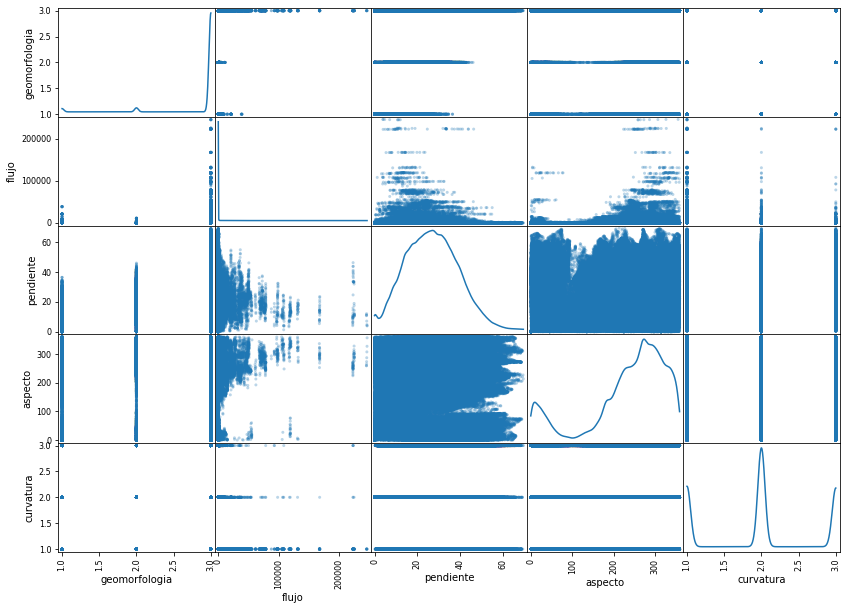

In [ ]:
 pd.plotting.scatter_matrix(matriz_cont, alpha = 0.3, figsize = (14,10), diagonal='kde')

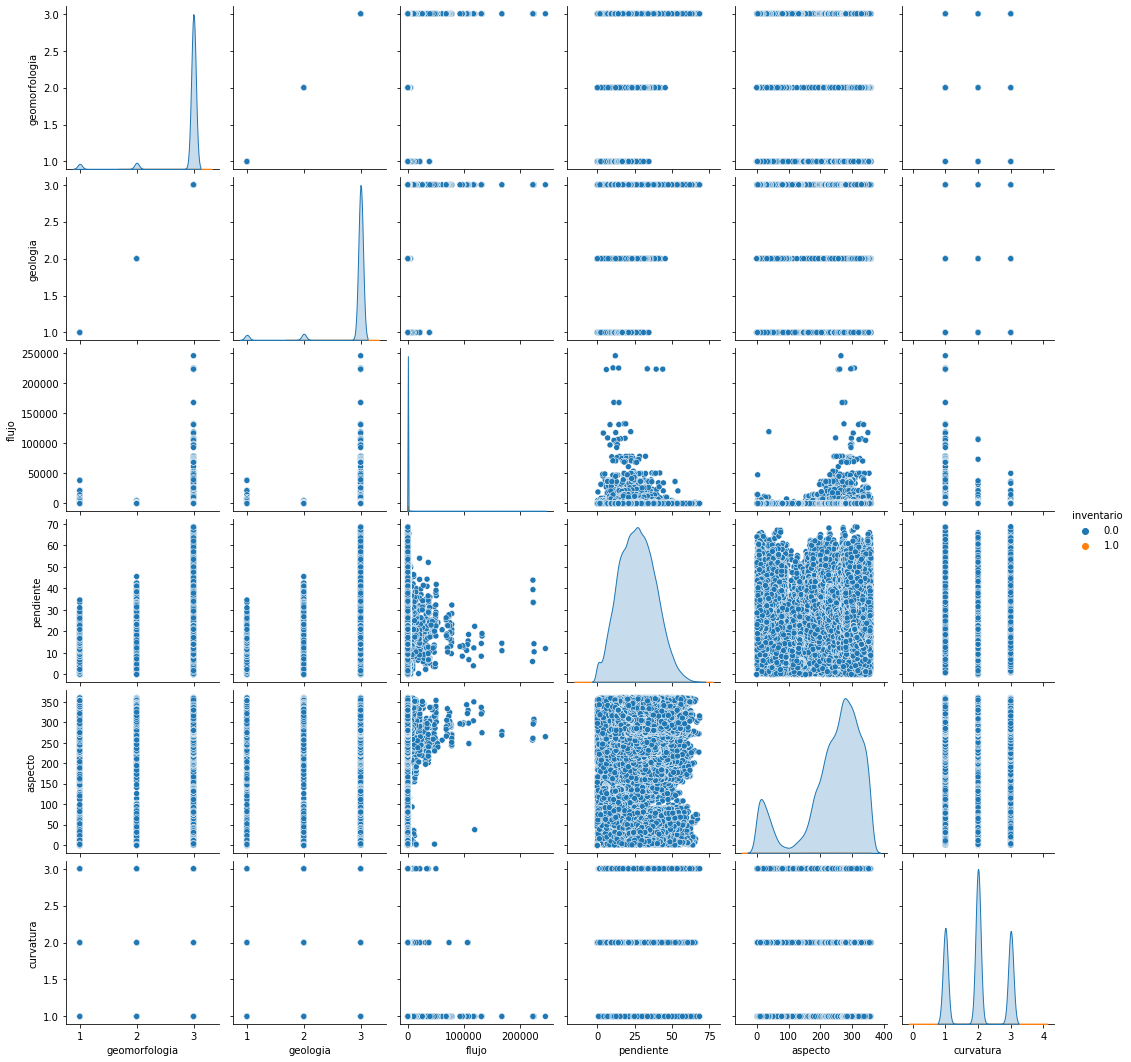

In [ ]:
sns.pairplot(df1, hue='inventario')